<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Capstone-Design/blob/main/Week13/1_3_Generative__KDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Density Estimation**
<img src='https://images.unsplash.com/photo-1560091129-27a0e2af124b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZGVuc2l0eXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=800&q=60' width=500 height=400>


### 밀도추정(density estimation)은 관측된 데이터 분포로부터 원래 변수의 확률 분포를 추정하고자 하는 것
- 1. outliers detection
- 2. non parametric classification
- 3. non parametric regression
- 4. cluster analysis / mode hunting

- **밀도 추정은 관찰된 데이터를 기반으로 관찰할 수 없는 기본 확률 밀도 함수의 추정을 구성하는 방법**
- **데이터 포인트를 데이터를 가장 잘 표현할 수 있는 곡선이나 함수에 매핑하는 것**


<img src='https://miro.medium.com/max/656/1*SlBPN0Fk9Ebq_4_dhJePZQ.gif' width=600>


**Different Kernel Functions**
<img src='https://miro.medium.com/max/1313/1*g7iGZX8-A_I7J-0GRDxHGw.png'>

<img src='https://yenaworldblog.files.wordpress.com/2019/01/kde-weight.gif?w=619&h=297&zoom=2'>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

## **1. Simple 1D Kernel Density Estimation**
- 1차원의 Kernel Density Estimation에 대한 이해
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

### <font color='red'>**Binning Bias, The Biggest Flaw of Histograms**
- Histograms group the values into intervals called **bins**, and **the height of each bin in a histogram** tells **the number of points in that bin**.

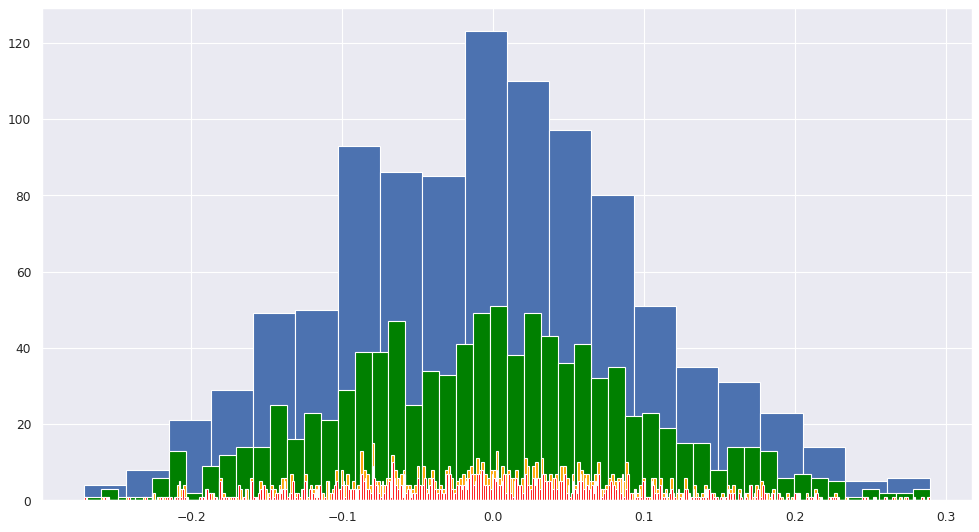

In [ ]:
# Plotting a normal distribution with different bins
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

#plotting the different bins
fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.hist(s,bins=20,label="10")
ax = plt.hist(s,bins=50,label="50",color="green")
ax = plt.hist(s,bins=300,label="300",color="orange")
ax = plt.hist(s,bins=500,label="500",color="red")

## **2. The importance of kernel density estimation bandwidth**
### 변수를 구간(bandwidth)으로 나누게 되고 이는 도수의 **smoothness**에 영향을 미침
- https://aakinshin.net/posts/kde-bw/

In [ ]:
plt.rcParams["figure.figsize"] = (12, 5)

<Axes: ylabel='Density'>

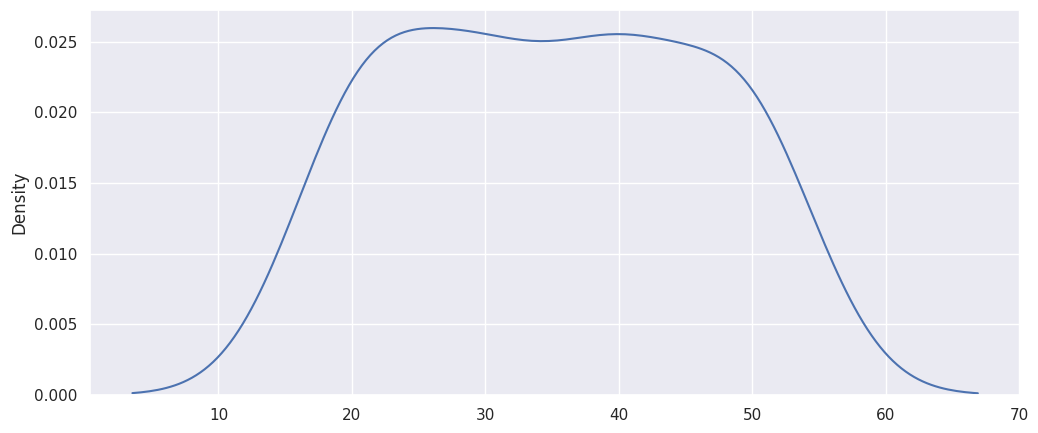

In [ ]:
a = np.array([21.370, 19.435, 20.363, 20.632, 20.404, 19.893, 21.511, 19.905, 22.018, 19.93,
              31.304, 32.286, 28.611, 29.721, 29.866, 30.635, 29.715, 27.343, 27.559, 31.32,
              39.693, 38.218, 39.828, 41.214, 41.895, 39.569, 39.742, 38.236, 40.460, 39.36,
              50.455, 50.704, 51.035, 49.391, 50.504, 48.282, 49.215, 49.149, 47.585, 50.03])

sns.kdeplot(a)

<Axes: ylabel='Density'>

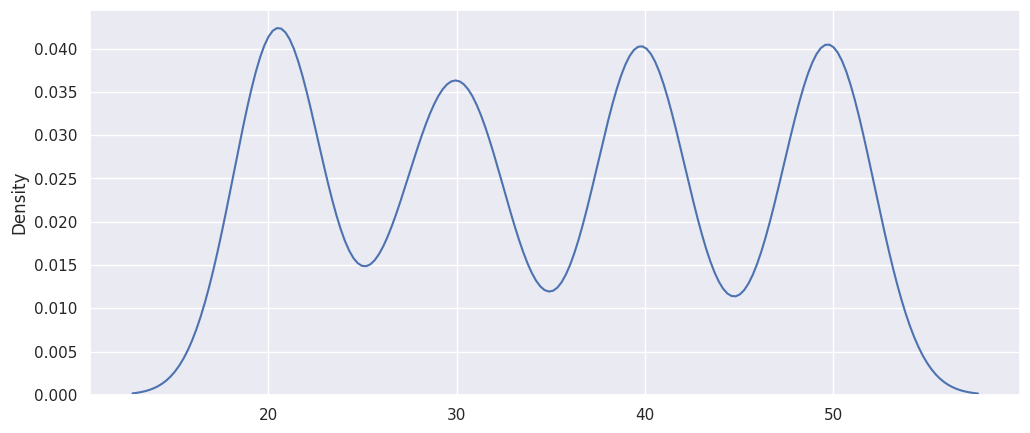

In [ ]:
sns.kdeplot(a, bw=0.2)

## **3. 히스토그램의 종류**
**3.1 데이터의 산포도(scatter)**

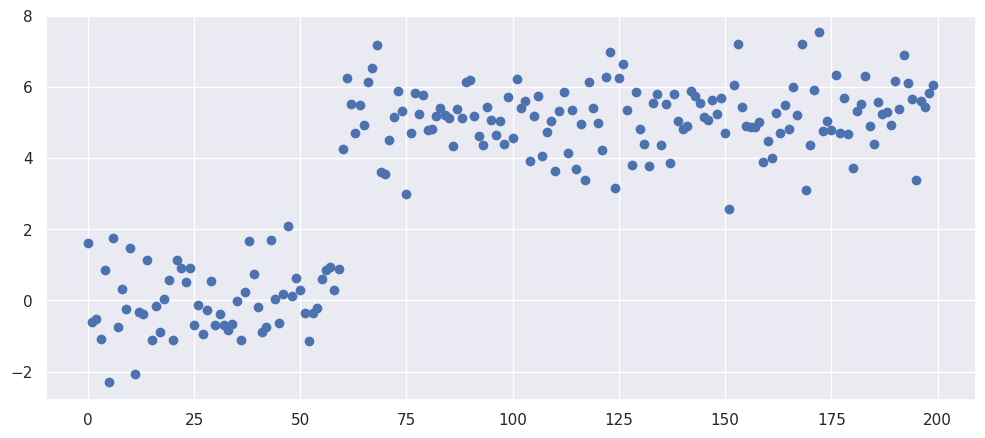

In [ ]:
np.random.seed(1)
N = 200
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
plt.scatter(np.arange(N), X)

**3.2. 히스토그램(Histogram, 도수분포도)과 Kernel Density Estimation**
- 개별 인스턴스를 보여주는 막대그래프와는 다르며 데이터의 range, 사분위수, 백분위수, 표준편차 등으로 표현
- 도수분포도는 각 구간(bin)별에 관측된 도수(관측빈도)를 막대그래프로 표현한 그래프
- 전체 자료의 범위를 구간(백분위수, 4분위수 등등)으로 구분하고, 각 구간에 포함되는 자료의 도수)개수를 산출한 표

<img src= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/f3b09505158fb06033aabf9b0116c8c07a68bf31'>

- [2.1,	-1.3,	-0.4,	1.9,	5.1,	6.2] 데이터의 히스토그램 만들기
- 6개의 bins로 폭의 크기는 2
  - $n$ = 6, $h$=2 ($h$는 varince라고 간주)
  - kernel 함수 수식 의미 : **한 개의 데이터가 구간에 떨어지면 1/12 크기의 박스가 생기고 한 개 떨어지면 블락처럼 쌓아올린다(Stacked)**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/1000px-Comparison_of_1D_histogram_and_KDE.png' width=600>

https://en.wikipedia.org/wiki/Kernel_density_estimation

<Figure size 1500x400 with 0 Axes>

<Axes: >

[-4.         -1.96666667  0.06666667  2.1         4.13333333  6.16666667
  8.2       ]


(array([1., 2., 1., 0., 1., 1.]),
 array([-4.        , -1.96666667,  0.06666667,  2.1       ,  4.13333333,
         6.16666667,  8.2       ]),
 <BarContainer object of 6 artists>)

(-7.0, 10.0)

([<matplotlib.axis.XTick at 0x7b4f05f63890>,
 [Text(-5, 0, '−5'),
  Text(0, 0, '0'),
  Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10')])

<Axes: >

<Axes: ylabel='Density'>

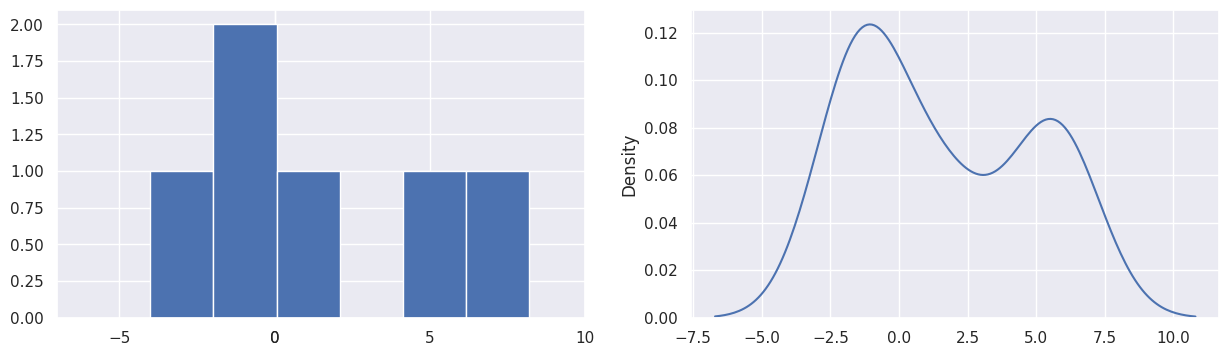

In [ ]:
x = np.array([-2.1,	-1.3,	-0.4,	1.9,	5.1,	6.2])
bins = np.linspace(-4, 8.2, 7)

plt.figure(figsize=(15,4)) # create a plot figure
plt.subplot(1, 2, 1) # (rows, columns, panel number)
print(bins)
plt.hist(x, bins=bins)
plt.xlim(-7, 10)
plt.xticks([-5,0,0,5,10])

plt.subplot(1, 2, 2) # (rows, columns, panel number)
sns.kdeplot(x, bw=1/2.25)

<Figure size 1500x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Tophat Kernel Density')

<Axes: >

Text(0.5, 1.0, 'Gaussian Kernel Density')

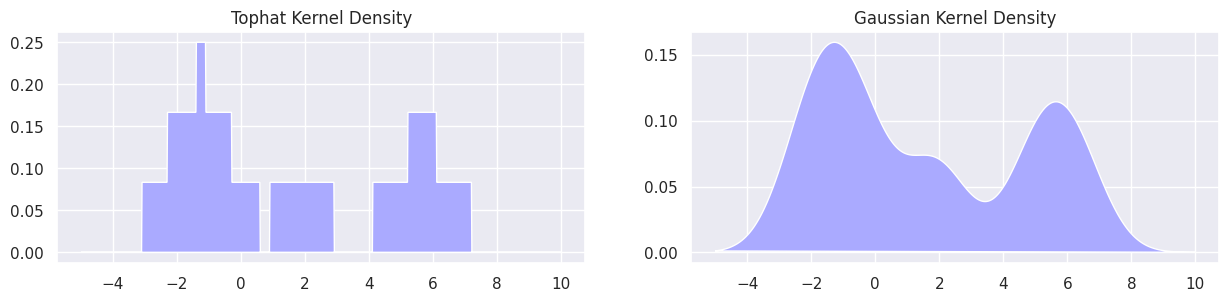

In [ ]:
from sklearn.neighbors import KernelDensity
x = x.reshape(-1,1)
x_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]    # np.linspace(-5, 10, 1000).reshape(-1,1)
plt.figure(figsize=(15,3)) # create a plot figure

# tophat KDE
plt.subplot(1, 2, 1) # (rows, columns, panel number)
kde = KernelDensity(kernel='tophat').fit(x)
log_dens = kde.score_samples(x_plot)
plt.fill(x_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Tophat Kernel Density")

# Gaussian KDE
plt.subplot(1, 2, 2)
kde = KernelDensity(kernel='gaussian').fit(x)
log_dens = kde.score_samples(x_plot)
plt.fill(x_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Gaussian Kernel Density")

- 히스토그램은 **구간(BINS, Bandwidth)에 해당되는 인스턴스 하나당 하나의 블록을 수직으로 쌓아올려 완성** (A histogram as a stack of blocks, one block per point)

### Bandwidth와 그래프를 이해
**Binning bias** is a pitfall of histograms where you will get **different representations of the same data** as you change the number of bins to plot.

**Case 1. 관측값의 최대 최소값을 균등 분할**

bin : min(x) -2.3015386968802827 and max(x) 7.528325706806398 10th percentile


Text(0.5, 1.0, '10 bins Histogram')

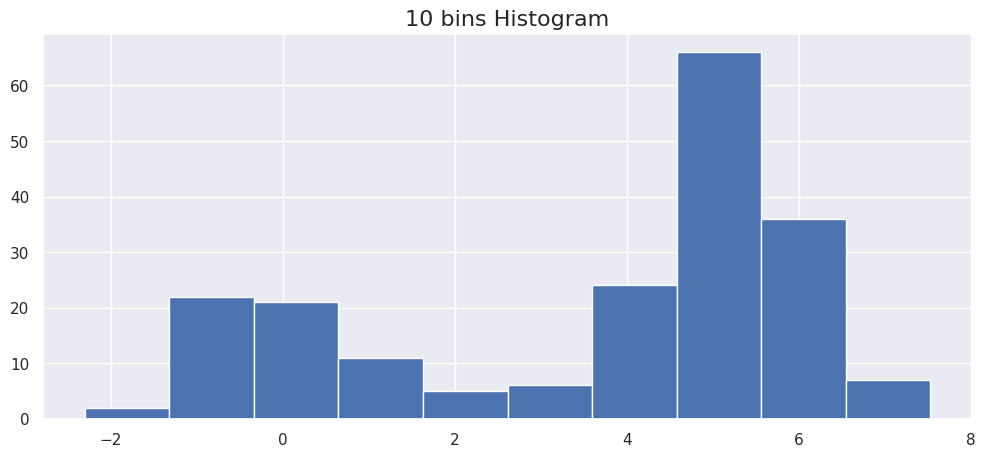

In [ ]:
#plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰드 꺠짐 방지
ax= plt.hist(X, bins=10)
print(f'bin : min(x) {X.min()} and max(x) {X.max()} 10th percentile')
plt.title("10 bins Histogram", fontsize=16)

**Case 2. 관측값의 (1 ~ 10) 특정 구간에서 균등 분할하는 bin**

bins: [ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]



Text(0.5, 1.0, 'Histogram')

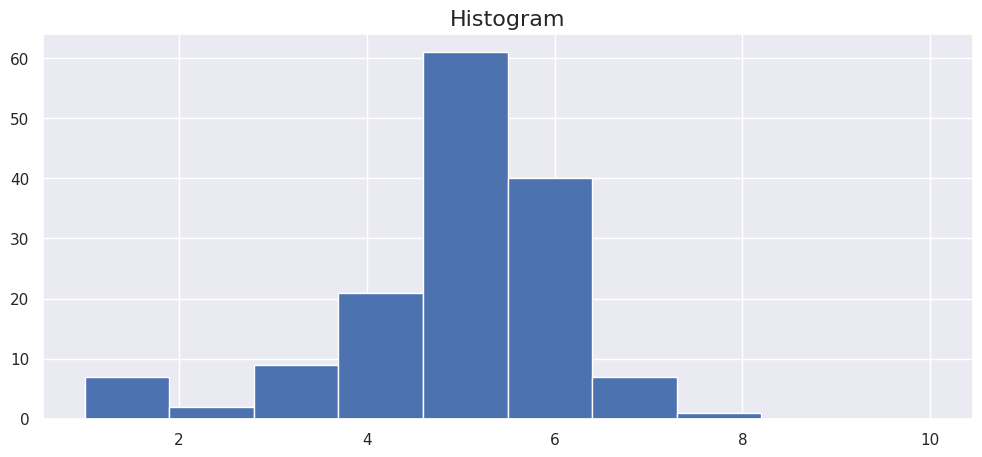

In [ ]:
bins = np.linspace(1, 10, 11) # 구간
print(f'bins: {bins}\n')
ax = plt.hist(X, bins=bins)
plt.title("Histogram", fontsize=16)

**Case 3. 관측값의 (-5 ~ 10) 특정 구간에서 균등 분할하는 bin**

bins: [-5.         -3.33333333 -1.66666667  0.          1.66666667  3.33333333
  5.          6.66666667  8.33333333 10.        ]



Text(0.5, 1.0, 'Histogram')

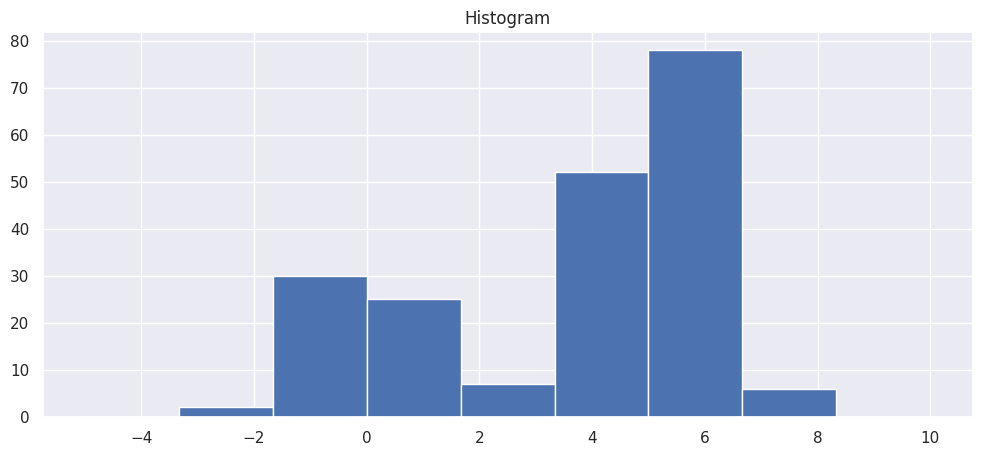

In [ ]:
bins = np.linspace(-5, 10, 10) # 구간
print(f'bins: {bins}\n')
ax = plt.hist(X, bins=bins)
plt.title("Histogram")

**Cse 4. 3가지 경우(균등분할, 위치이동, bins의 증가) Histogram**

<Axes: >

(array([ 0.,  2., 30., 25.,  7., 52., 78.,  6.,  0.]),
 array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
         3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Histogram')

<Axes: >

(array([ 0.,  8., 38., 14., 18., 88., 33.,  1.,  0.]),
 array([-4.25      , -2.58333333, -0.91666667,  0.75      ,  2.41666667,
         4.08333333,  5.75      ,  7.41666667,  9.08333333, 10.75      ]),
 <BarContainer object of 9 artists>)

Text(0.5, 1.0, 'Histogram, bins shifted')

<Axes: >

(array([ 2.,  0.,  9., 13., 11., 10.,  8.,  3.,  4.,  1.,  2.,  4., 11.,
        13., 30., 36., 23., 13.,  3.,  4.]),
 array([-2.3015387 , -1.81004548, -1.31855226, -0.82705904, -0.33556582,
         0.1559274 ,  0.64742062,  1.13891384,  1.63040706,  2.12190028,
         2.6133935 ,  3.10488673,  3.59637995,  4.08787317,  4.57936639,
         5.07085961,  5.56235283,  6.05384605,  6.54533927,  7.03683249,
         7.52832571]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram, much more bins')

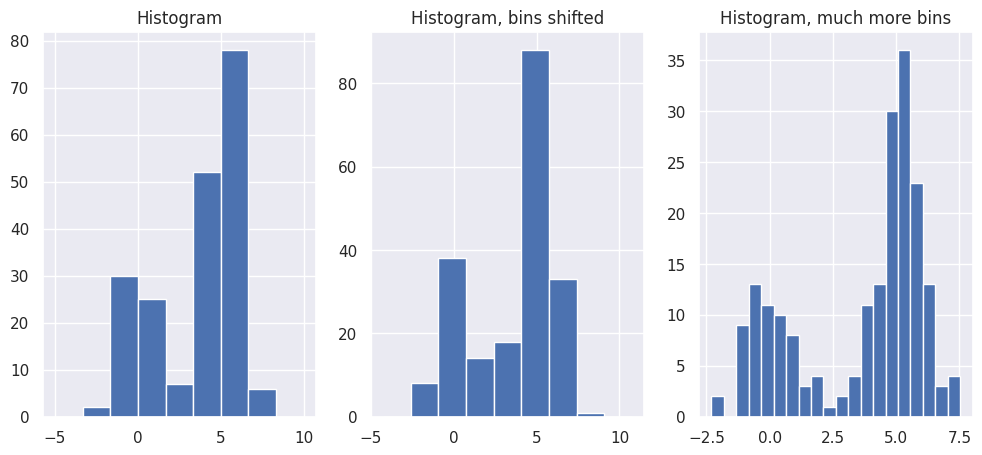

In [ ]:
# create the first of two panels and set current axis
plt.subplot(1, 3, 1) # (rows, columns, panel number)
plt.hist(X, bins=bins, fc='#AAAAFF')
plt.title("Histogram")

# create the second panel and set current axis
plt.subplot(1, 3, 2)
plt.hist(X, bins=bins + 0.75, fc='#AAAAFF')
plt.title("Histogram, bins shifted")

# create the second panel and set current axis
plt.subplot(1, 3, 3)
plt.hist(X, bins= 20, fc='#AAAAFF')
plt.title("Histogram, much more bins")

## <font color='blue'>**Hyperparameter (# of bins, bandwidth size)**
**bins 구성에 따라 데이터 분포가 다르게** 나타나게 되어 mis visulization 가능성이 있다. **bin의 개수가 많아지면 질수록 noise가 있을 수 있으나 세밀한 분포**를 알 수가 있다.
<font color='red'>**그러나 Overfitting !**

## **4. Kernels distribution function learning(transformation)로 변환**
관측값 X를 커널로 fitting하여 -5 부터 10까지 구간을 1,000개로 구분한(bins=1,000) 값을 생성

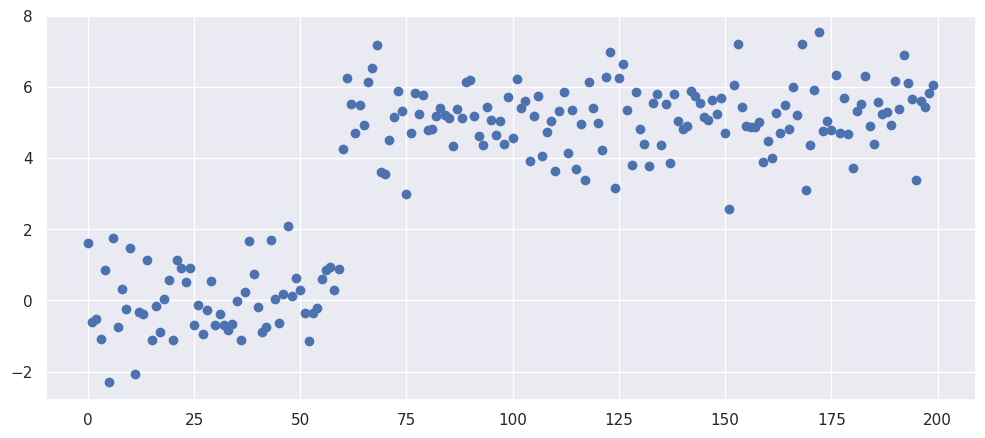

In [ ]:
np.random.seed(1)
N = 200
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
plt.scatter(np.arange(N), X)

<Figure size 1500x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Tophat Kernel Density')

<Axes: >

Text(0.5, 1.0, 'Gaussian Kernel Density')

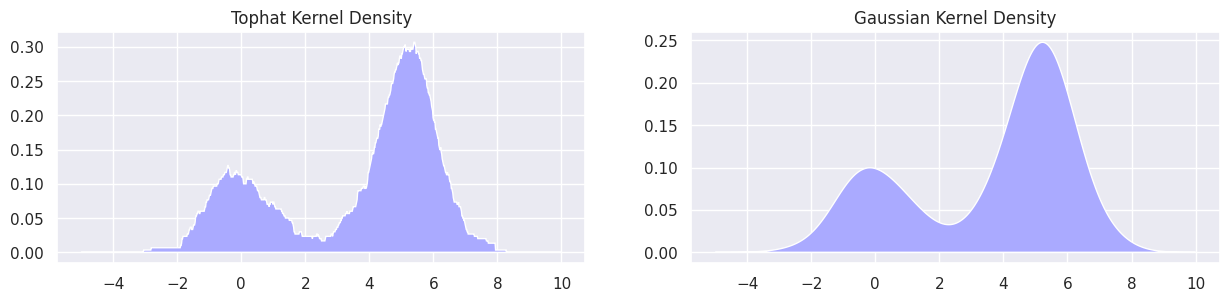

In [ ]:
from sklearn.neighbors import KernelDensity

plt.figure(figsize=(15,3)) # create a plot figure
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]    # np.linspace(-5, 10, 1000).reshape(-1,1)

# create the first of two panels and set current axis
# tophat KDE
plt.subplot(1, 2, 1) # (rows, columns, panel number)
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Tophat Kernel Density")

# Gaussian KDE
plt.subplot(1, 2, 2)
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Gaussian Kernel Density")

<Axes: ylabel='Density'>

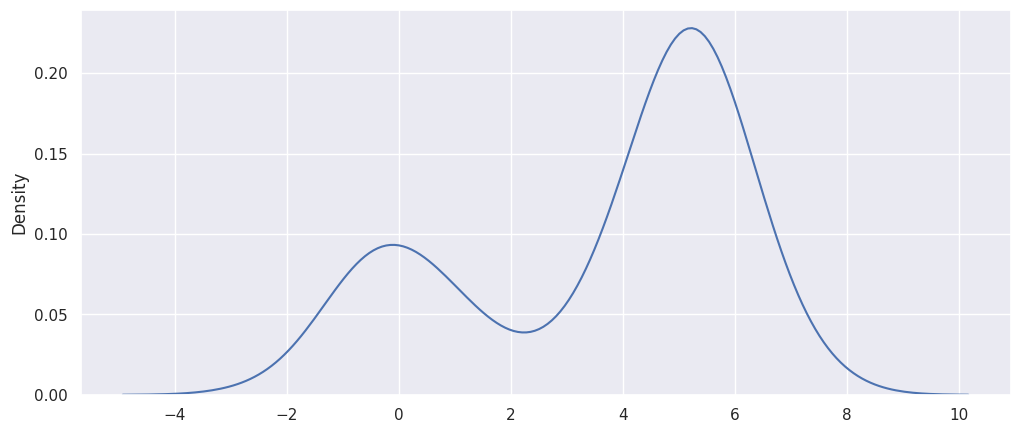

In [ ]:
sns.kdeplot(X.ravel())

https://rstudio-pubs-static.s3.amazonaws.com/238698_f5c485e2a4f2441dbc9a52ebda0fe8c0.html

<img src='https://yenaworldblog.files.wordpress.com/2019/01/kde-bandwidth%EB%B3%80%ED%99%942.gif?w=619&h=407&zoom=2'>

## **5. Kernel로 iris 데이터를 Clustering**
**Unsupervised learning using kernel function**

**Kernel distribution estimation**

- 'petal length'와 'petal_width'의 kde를 확인하면 'speices'를 확연히 2개의 그룹으로 분리하고 있음 (나머지 2개는 애매하게 보임)

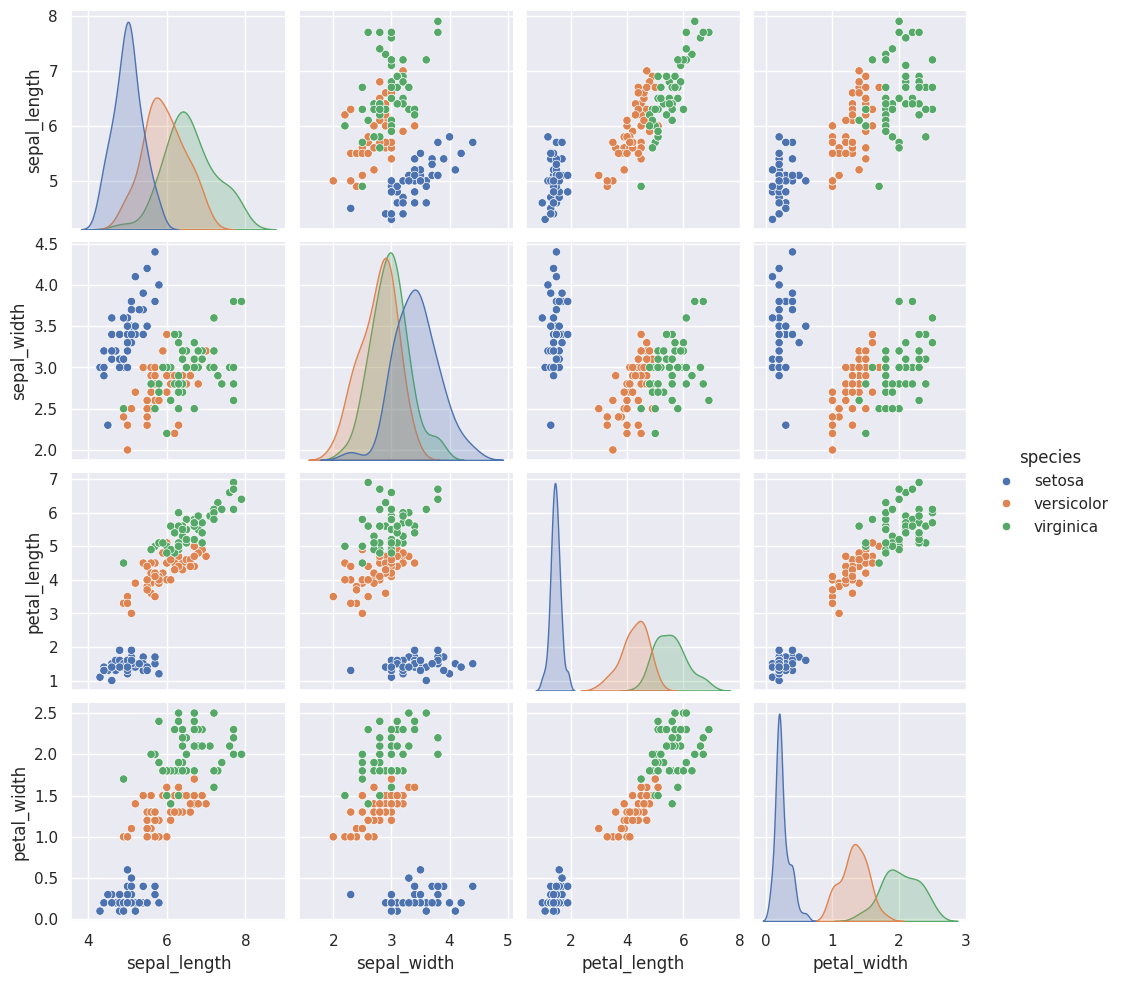

In [ ]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

- Case 1. 'sepal length'로 kde를 확인하면 2개 그룹이 숨어있는 듯(latent)
- Case 2. 'petal length'의 데이터를 바탕으로 최적의 bandwidth를 GridSearchCV()로 찾아내 kde를 그려보면 **2개의 잠재 그룹이 존재한다고 Unsupervised learning**
- Case 3. 모든 데이터를 사용하여 Unsupervised learning

**Case 1. Find latent groups with sepal length**
- 2~3 개의 잠재그룹이 있는 것 같기도 함

In [ ]:
from sklearn.datasets import load_iris
X, _ = load_iris(return_X_y= True)

<Axes: >

Text(0.5, 1.0, 'Gaussian Kernel Density')

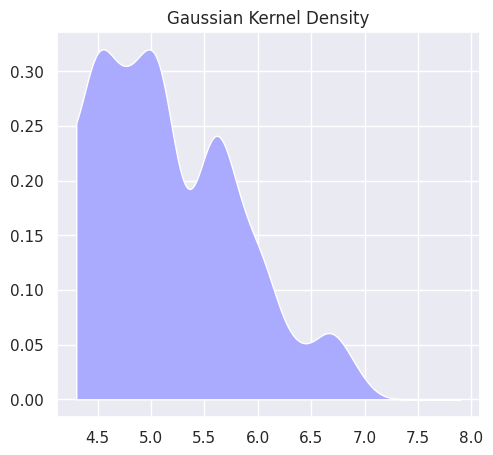

<Axes: >

Text(0.5, 1.0, 'Tophat Kernel Density')

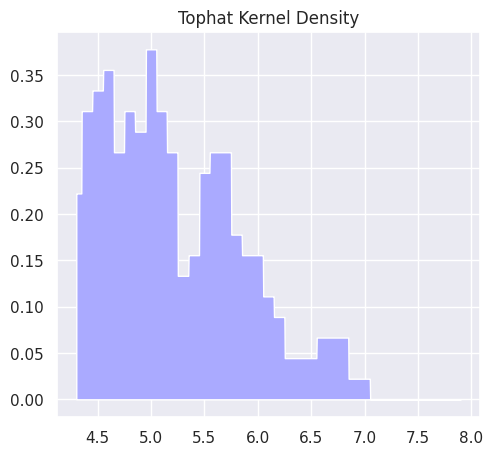

In [ ]:
from sklearn.neighbors import KernelDensity
X_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)[:, np.newaxis]

# create the first of two panels and set current axis
# Gaussian KDE
plt.subplot(1, 2, 1) # (rows, columns, panel number)
kde = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(X[:, 2].reshape(-1,1))
log_dens = kde.score_samples(X_plot)
plt.fill_between(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Gaussian Kernel Density")
plt.show()

# tophat KDE
plt.subplot(1, 2, 2) # (rows, columns, panel number)
kde = KernelDensity(kernel='tophat', bandwidth=0.15).fit(X[:, 2].reshape(-1,1))
log_dens = kde.score_samples(X_plot)
plt.fill_between(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
plt.title("Tophat Kernel Density")
plt.show()

**Case 2. Find latent groups with petal length**
- 2개의 잠재그룹이 확실히 있다고 판단할 있음

In [ ]:
from sklearn.model_selection import GridSearchCV
# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X[:, 2].reshape(-1,1))
print('\n')
grid.best_estimator_

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

KernelDensity(bandwidth=np.float64(0.16237767391887217))

<Axes: ylabel='Density'>

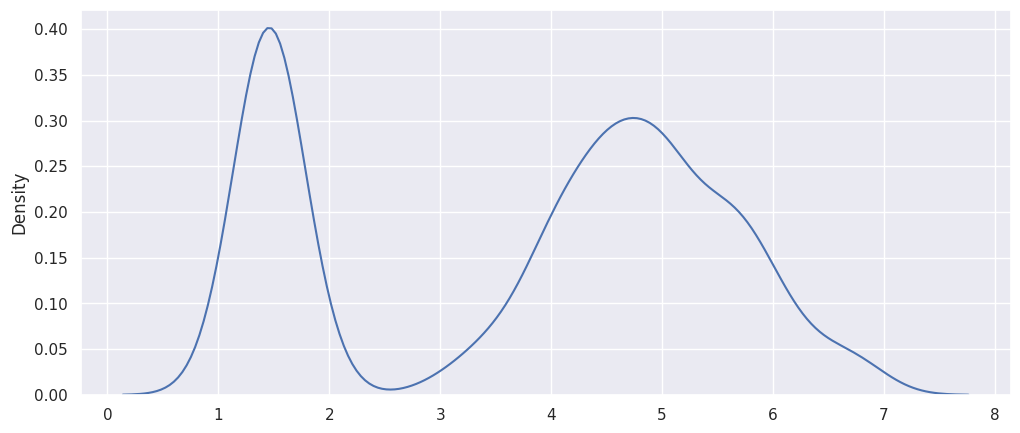

In [ ]:
sns.kdeplot(X[:, 2], bw=0.16237767391887217)

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

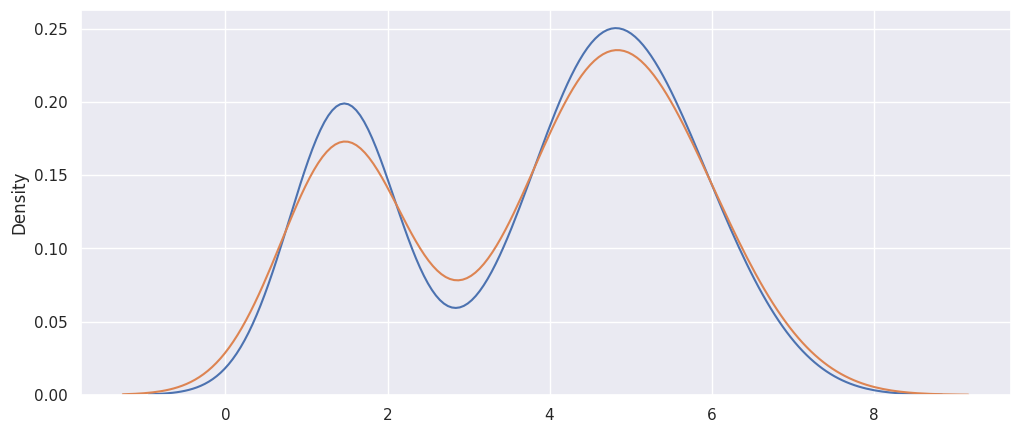

In [ ]:
sns.kdeplot(X[:, 2])
sns.kdeplot(X[:, 2], bw=0.42813323987193935)

<Axes: ylabel='Density'>

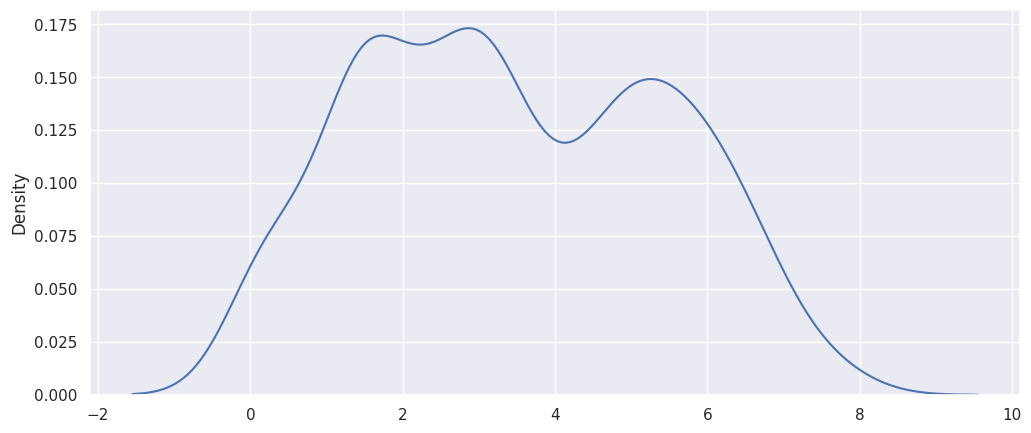

In [ ]:
sns.kdeplot(X.ravel())

**Case 3. Find latent groups with all features**
- 3개 이상(거의 3개) 잠재그룹이 확실히 있다고 판단할 있음

In [ ]:
# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X)
print('Wn')
grid.best_estimator_

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

Wn


KernelDensity(bandwidth=np.float64(0.20691380811147897))

<Axes: ylabel='Density'>

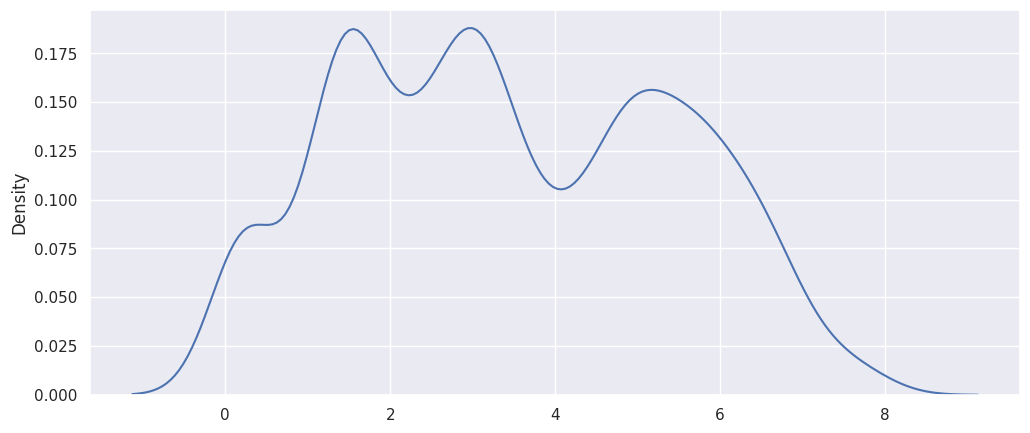

In [ ]:
sns.kdeplot(X.ravel(), bw=0.20691380811147897)

## **6. Generative Model with Kernel Density Estimation**
KDE을 사용하여 데이터 세트에 대한 생성 모델을 학습하여 **생성 모델(generative model)**을 완성하여 새로운 샘플을 그릴 수 있는 방법
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)

**Step 1. 주성분으로 시각화(2차원)**

64차원 원자료   크기: (1797, 64)
 2차원 축소자료 크기: (1797, 2)


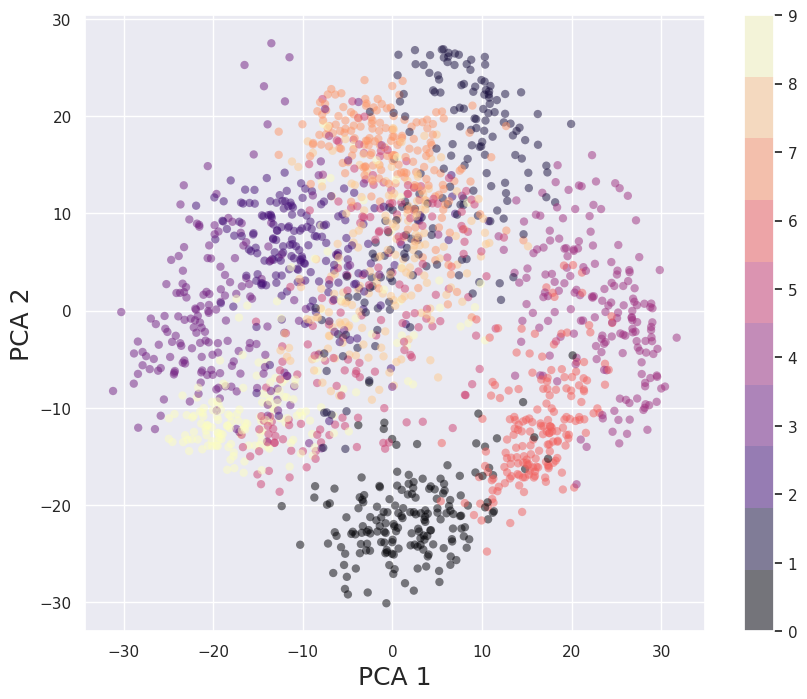

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(f'64차원 원자료   크기: {digits.data.shape}')
print(f' 2차원 축소자료 크기: {projected.shape}')

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('PCA 1', fontsize=18); plt.ylabel('PCA 2', fontsize=18)
plt.colorbar();

**Step 2. 주성분 15개로 차원 축소, 최적의 bandwidth 하이퍼파라미터 튜닝**

In [ ]:
# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)
print('\n')
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})



best bandwidth: 3.79269019073225


**Step 3. 최적의 하이퍼파라미터 KDE를 객체화**
- sample 2개만 임의의 번호를 생성

In [ ]:
# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_
kde

KernelDensity(bandwidth=np.float64(3.79269019073225))

In [ ]:
# sample 2 new points from the data
kde.sample(2, random_state=0)

array([[ -8.25555185,  19.74759865, -21.09470411,  -5.7041774 ,
          1.55040113,  -1.09352638, -13.15826492,  -0.90515185,
         -3.19409013,   4.81740233,  -1.49116101,  -1.19663481,
          3.28208789,   8.62566682,   4.71688866],
       [-12.88631405,  -7.67181078,  10.3166078 , -17.08822477,
         -2.20867071,  -1.20258422,  -3.6556962 ,  -1.60552785,
         -5.75438434,   1.87585846,  -9.20762231,   2.73661563,
          9.87506429,  -1.46152405,   0.82485461]])

**Step 4. Sample 44개를 Generation 한다(Generative Model)**

In [ ]:
# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)
new_data.shape
print('\n')
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
new_data.shape
real_data = digits.data[:44].reshape((4, 11, -1))
print('\n')
real_data.shape

(44, 64)

(4, 11, 64)

(4, 11, 64)

Text(0.5, 1.0, 'Selection from the input data')

Text(0.5, 1.0, '"New" digits drawn from the kernel density model')

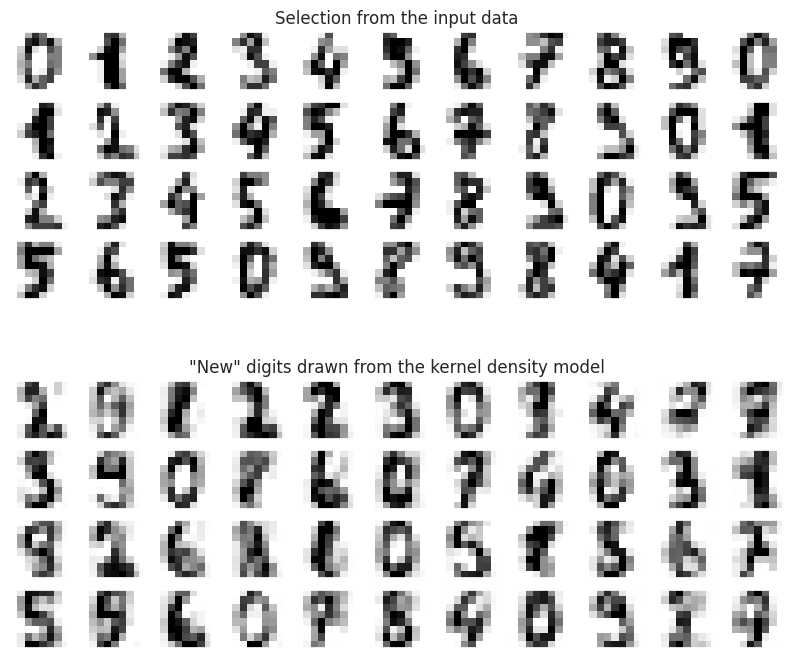

In [ ]:
# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

# End